# Melboune house project Layout

### Team members: Mehul Haria, Naureen Pethani and Raymond (shanhua) Huang

### 1. Data structure. It inclues data cleaning against data type, outliers, null value.

##### 1.1 Exploring data, such select_dtypes().columns, describe(), info() and shape()

##### 1.2 Changing data type, date type and catogory type

##### 1.3 Dealing with null value, mainly replacing null in price with mode using fillna()

##### 1.4 Finding outliers


### 2. Data presentation and prediction 7 section. (27239 records)

##### 2.1 Year vs price per type

##### 2.2 Price prediction for 2019

###### 2.2.1 Predict price for unit in S Metro 

###### 2.2.1 Predict price for unit in E Metro 

##### 2.3 Season vs price 

##### 2.4 Region vs price change and growth rate vs year

###### 2.4.1 Region price change vs year per type

###### 2.4.2 Feature engineering to get count growth and price growth against year per region and type

###### 2.4.2.1 Price growth rate over 0.05 table per region and type

###### 2.4.2.2 Top 20 region per type with largest count

###### 2.4.2.3 Count growth rate over 0.2 table per region and type

###### 2.4.2.4 Actual count over 1000 for each year pet type and region

##### 2.5 Other features method, distance, rooms, car vs price

###### 2.5.1 Method vs Price

###### 2.5.2 Rooms # impact on Price VS Year

###### 2.5.3 Distance vs Price

###### 2.5.4 Car spot vs Price

##### 2.6 Ideal house type for top 10 region per type max count of sales

##### 2.6.1 Top 10 house type in S Metro with different rooms and bathrooms by count

##### 2.6.2 Top 10 house type in all regions per type with different rooms and bathrooms by count

##### 2.6.3 Top 10 units in E Metro with different rooms and bathrooms by count

##### 2.7 Heat map for relationships

### 3. Data linear modeling to see which variable contribute most (20394 records)

##### 3.1 Prepare the dataset and label for training models, include removing all null value, get_dummies of region, change type into numeric

##### 3.2 Getting coefficient

##### 3.3 Random forest model

##### 3.4 Model comparison get score function


### 4. Performance evaluation  sample size vs machine learning

##### 4.1 Define fuction to get correlation, refine results and storage value

##### 4.2 Learning curve : Plot training scores against validation score

### 5. Conclusion


In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [2]:
melbourne_data =  pd.read_csv('data/Melbourne_housing_FULL.csv')

In [3]:
melbourne_data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


# 1.Exploring Data and data cleaning

# 1.1 Exploring data

In [4]:
melbourne_data.shape

(34857, 21)

In [5]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

Looking at the data information above, we can see that non-numerical data is being considered as object. The list included following columns: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname'
In next few steps we will be changing object data types to categorical and date data types

In [6]:
## verifying columns with object data type
print(melbourne_data.select_dtypes(["object"]).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


# 1.2 Changing data type

In [7]:
##changing all object data types to category - This step is necessary to be able to plot categorical data for our analysis
objdtype_cols = melbourne_data.select_dtypes(["object"]).columns
melbourne_data[objdtype_cols] = melbourne_data[objdtype_cols].astype('category')

In [8]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null category
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), float64(12), int64(1)
me

In [9]:
## looking at data information above, we can notice that "Data" is also converted to category. 
## In this step we will cast date to datetime
melbourne_data['Date'] =  pd.to_datetime( melbourne_data['Date'])

In [10]:
## the following command suggests that all our data types are now in required format
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(7), datetime64[ns](1),


For next few steps we will be doing data prepration for Numerical Feature Variables

In [11]:
## describe command will give us all statstical information about our numeric variables
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Observing above information abount numerical data, it can be noticed that Postcode is also being treated as numerical data. Since we know that Postcode is a catergorical data, we will be casting it to category

In [12]:
melbourne_data["Postcode"] = melbourne_data["Postcode"].astype('category')

In [13]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01



After carefully evaluating data, it can be noticed that variables "Rooms" and "Bedroom2" are pretty much similar and one of the columns should be removed to avoid duplication of data

In [14]:
## in this step we will first confirm our above statemnt by obesrving "Rooms" and "Bedroom2"

melbourne_data['b 2 r'] = melbourne_data["Bedroom2"] - melbourne_data["Rooms"]
melbourne_data[['b 2 r', 'Bedroom2', 'Rooms']].head()

,b 2 r,Bedroom2,Rooms
0,0.0,2.0,2
1,0.0,2.0,2
2,0.0,2.0,2
3,0.0,3.0,3
4,0.0,3.0,3


In [15]:
## We can see that the difference is very minimal here that is will be wise to remove one of the 2 columns
melbourne_data = melbourne_data.drop(['b 2 r', 'Bedroom2'], 1)

# 1.3 Working with missing data



There are multiple ways that we can use to explore missisng data. Here we will be using a visual way first to get some hint. In later step we will do some calculations to get exact number of missing data from each variables. Based on data, our experience and business need we will either fill in missing values or we will drop rows or columns having null values

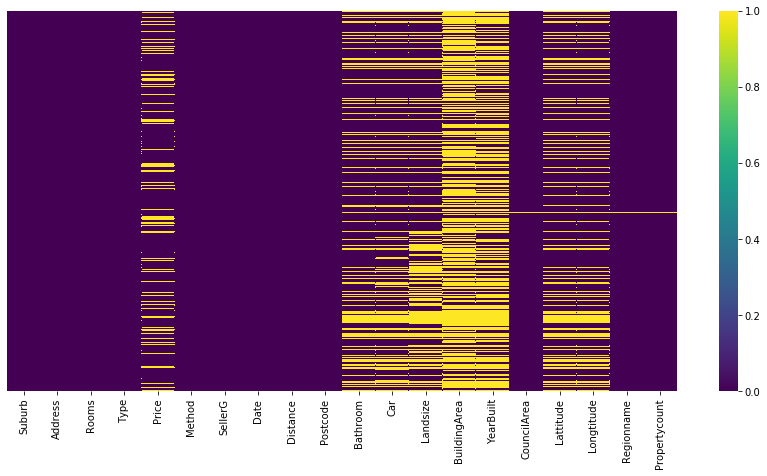

In [16]:
## visualizing missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(melbourne_data.isnull(), yticklabels=False,cmap='viridis')

From the visual above, it can be concluded that we have few missing data in Price, Bathroom, Car and Landsize, Longitude and Latitude columns. There are so many missing values in Building Area and Year Built features. In next step let's explore the count of missing values

In [17]:
# Percentage of missing values
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64


From the information above, we can notice that few feature varaibles still have large percentage of missing values. At this point we are ignoring it, but at later state if we will take those as our feature variables for oour model, we will explore ways to fill in those information or to remove those from our data.

In [18]:
melbourne_data = melbourne_data.drop(["Landsize", "BuildingArea", "YearBuilt"], axis=1)

In [19]:
## Also since our target variable is price, it makes sense to drop rows for Price columns wher price values are missing
melbourne_data.dropna(subset=["Price"], inplace=True)

In [20]:
#from sklearn.preprocessing import Imputer
#X=melbourne_data[['Bathroom','Car']]
#imp=Imputer(missing_values='NaN',strategy='median',axis=0)
#imp.fit(X)
#X=pd.DataFrame(data=imp.transform(X),columns=X.columns)
#melbourne_data[['Bathroom','Car']]=X

In [21]:
melbourne_data['Car']=melbourne_data['Car'].fillna(melbourne_data['Car'].mode()[0])
melbourne_data['Bathroom']=melbourne_data['Bathroom'].fillna(melbourne_data['Bathroom'].mode()[0])

In [22]:
melbourne_data.shape

(27247, 17)

In [23]:
# Percentage of missing values
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bathroom          0.000000
Car               0.000000
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

# 1.4 Finding Outliers


Outliers can significantly impact data analysis and can also impact normalization of data. It is very important in during data prepration to indentify them remove them. In next few steps we will work in our data to get rid of outliers (if any)

In [24]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Bathroom,27247.0,1.451683e+00,0.661993,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,27247.0,1.786655e+00,0.869543,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Lattitude,20993.0,-3.780696e+01,0.091619,-38.19043,-37.8609,-37.80046,-3.774897e+01,-3.739780e+01
Longtitude,20993.0,1.449967e+02,0.120680,144.42379,144.9253,145.00320,1.450688e+02,1.455264e+02
Propertycount,27244.0,7.566781e+03,4492.382418,83.00000,4294.0000,6567.00000,1.041200e+04,2.165000e+04


From the statstical summary above we can see that max price in our data is nearly $11.2 million. That looks like a clear outlier. But before removing it, lets first ensure that we have very few values in that range.

In [25]:
## to findout outliers lets divide data into different price ranges to identify number of occurences of data in different price ranges
melbourne_data['PriceRange'] = np.where(melbourne_data['Price'] <= 100000, '0-100,000',  
                                       np.where ((melbourne_data['Price'] > 100000) & (melbourne_data['Price'] <= 1000000), '100,001 - 1M',
                                                np.where((melbourne_data['Price'] > 1000000) & (melbourne_data['Price'] <= 3000000), '1M - 3M',
                                                        np.where((melbourne_data['Price']>3000000) & (melbourne_data['Price']<=5000000), '3M - 5M',
                                                                np.where((melbourne_data['Price']>5000000) & (melbourne_data['Price']<=6000000), '5M - 6M',
                                                                        np.where((melbourne_data['Price']>6000000) & (melbourne_data['Price']<=7000000), '6M - 7M',
                                                                                np.where((melbourne_data['Price']>7000000) & (melbourne_data['Price']<=8000000), '7M-8M', 
                                                                                         np.where((melbourne_data['Price']>8000000) & (melbourne_data['Price']<=9000000), '8M-9M', 
                                                                                                 np.where((melbourne_data['Price']>9000000) & (melbourne_data['Price']<=10000000), '9M-10M', 
                                                                                                         np.where((melbourne_data['Price']>10000000) & (melbourne_data['Price']<=11000000), '10M-11M', 
                                                                                                                 np.where((melbourne_data['Price']>11000000) & (melbourne_data['Price']<=12000000), '11M-12M', '')
                                                                                                                 ))))))))))

In [26]:
melbourne_data.groupby(['PriceRange']).agg({'PriceRange': ['count']})


,PriceRange
,count
PriceRange,
"0-100,000",1
"100,001 - 1M",16496
11M-12M,1
1M - 3M,10304
3M - 5M,388
5M - 6M,40
6M - 7M,14
7M-8M,2


By exploring above table, it can be concluded that:
- 1 data item in the range 0-100,00 
- 2 data item in range 7M - 8M
- 1 data item in range 8M - 9M
- 1 data item in range 11M - 12M
For the purpose of this study, let us drop rows that match above mentioned conditions

In [27]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 18 columns):
Suburb           27247 non-null category
Address          27247 non-null category
Rooms            27247 non-null int64
Type             27247 non-null category
Price            27247 non-null float64
Method           27247 non-null category
SellerG          27247 non-null category
Date             27247 non-null datetime64[ns]
Distance         27246 non-null float64
Postcode         27246 non-null category
Bathroom         27247 non-null float64
Car              27247 non-null float64
CouncilArea      27244 non-null category
Lattitude        20993 non-null float64
Longtitude       20993 non-null float64
Regionname       27244 non-null category
Propertycount    27244 non-null float64
PriceRange       27247 non-null object
dtypes: category(8), datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [28]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Bathroom,27247.0,1.451683e+00,0.661993,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,27247.0,1.786655e+00,0.869543,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Lattitude,20993.0,-3.780696e+01,0.091619,-38.19043,-37.8609,-37.80046,-3.774897e+01,-3.739780e+01
Longtitude,20993.0,1.449967e+02,0.120680,144.42379,144.9253,145.00320,1.450688e+02,1.455264e+02
Propertycount,27244.0,7.566781e+03,4492.382418,83.00000,4294.0000,6567.00000,1.041200e+04,2.165000e+04


In [29]:
melbourne_data.drop(melbourne_data[(melbourne_data['PriceRange'] == '0-100,000') |
                                   (melbourne_data['PriceRange'] == '7M-8M') |
                                   (melbourne_data['PriceRange'] == '8M-9M') |
                                   (melbourne_data['PriceRange'] == '11M-12M')].index, inplace=True)

In [30]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27242.0,2.992218e+00,0.954690,1.00000,2.000000,3.00000,4.000000e+00,1.600000e+01
Price,27242.0,1.049047e+06,634071.219952,112000.00000,635000.000000,870000.00000,1.295000e+06,7.000000e+06
Distance,27241.0,1.128051e+01,6.787762,0.00000,6.400000,10.50000,1.400000e+01,4.810000e+01
Bathroom,27242.0,1.451509e+00,0.661618,0.00000,1.000000,1.00000,2.000000e+00,9.000000e+00
Car,27242.0,1.786580e+00,0.869334,0.00000,1.000000,2.00000,2.000000e+00,1.800000e+01
Lattitude,20988.0,-3.780695e+01,0.091624,-38.19043,-37.860878,-37.80042,-3.774891e+01,-3.739780e+01
Longtitude,20988.0,1.449967e+02,0.120686,144.42379,144.925300,145.00320,1.450688e+02,1.455264e+02
Propertycount,27239.0,7.566708e+03,4492.624011,83.00000,4294.000000,6567.00000,1.041200e+04,2.165000e+04


In [31]:
melbourne_data.groupby(['Rooms'])['Rooms'].count()

Rooms
1      1195
2      6787
3     11956
4      5916
5      1208
6       137
7        20
8        14
9         1
10        5
12        2
16        1
Name: Rooms, dtype: int64

In [32]:
melbourne_data.drop(melbourne_data[(melbourne_data['Rooms'] == 12) | 
                                   (melbourne_data['Rooms'] == 16)].index, inplace=True)

In [33]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27239.0,2.991079e+00,0.948347,1.00000,2.0000,3.0000,4.000000e+00,1.000000e+01
Price,27239.0,1.048780e+06,633264.427094,112000.00000,635000.0000,870000.0000,1.295000e+06,7.000000e+06
Distance,27238.0,1.127979e+01,6.786793,0.00000,6.4000,10.5000,1.400000e+01,4.810000e+01
Bathroom,27239.0,1.451155e+00,0.660108,0.00000,1.0000,1.0000,2.000000e+00,9.000000e+00
Car,27239.0,1.786299e+00,0.868535,0.00000,1.0000,2.0000,2.000000e+00,1.800000e+01
Lattitude,20985.0,-3.780696e+01,0.091627,-38.19043,-37.8609,-37.8004,-3.774892e+01,-3.739780e+01
Longtitude,20985.0,1.449967e+02,0.120651,144.42379,144.9253,145.0032,1.450687e+02,1.455264e+02
Propertycount,27236.0,7.566741e+03,4492.747970,83.00000,4294.0000,6567.0000,1.041200e+04,2.165000e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC60182668>,
      dtype=object)

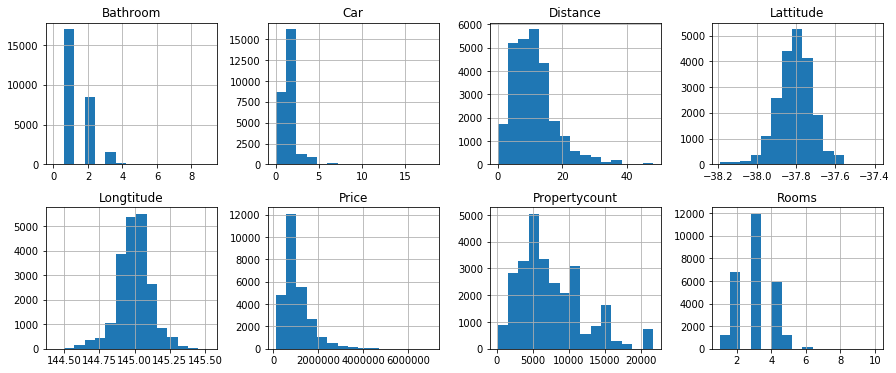

In [34]:
##sns.distplot(melbourne_data, kde=False, bins=20).set(xlabel='Price');
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
##melbourne_data.select_dtypes(include = numerics)
melbourne_data.select_dtypes(include = numerics).hist(bins=15, figsize=(15, 6), layout=(2, 4))

In [35]:
melbourne_data['Distance'] = round(melbourne_data['Distance'])

In [36]:
melbourne_data.shape

(27239, 18)

27239 record will be used for presenting

# 2.0 Data presentation and relationship

# 2.1 The first factor we look at is the price versus year and season. Then predict price using linear function for 2019 and 2020.

# 2.1.1 Price trend against year per house type

In [37]:
## extract year from date
melbourne_data['Year']=melbourne_data['Date'].apply(lambda x:x.year)
melbourne_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceRange,Year
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.0,3067.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1M - 3M,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.0,3067.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1M - 3M,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.0,3067.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1M - 3M,2017
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.0,3067.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,"100,001 - 1M",2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.0,3067.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1M - 3M,2016


In [38]:
#data subset by type
#house price
melbourne_data_h=melbourne_data[melbourne_data['Type']=='h']
#condo price
melbourne_data_u=melbourne_data[melbourne_data['Type']=='u']
#townhouse price
melbourne_data_t=melbourne_data[melbourne_data['Type']=='t']
#house,condo and town house price groupby year and mean
melbourne_data_h_y=melbourne_data_h.groupby('Year').mean()
melbourne_data_u_y=melbourne_data_u.groupby('Year').mean()
melbourne_data_t_y=melbourne_data_t.groupby('Year').mean()
melbourne_data_h_y.head()


,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,Propertycount
Year,,,,,,,,
2016,3.225399,1.285387e+06,9.252613,1.490436,1.743443,-37.803695,144.985510,7170.396766
2017,3.348415,1.180507e+06,13.312164,1.567866,1.920823,-37.803014,145.001310,7416.489105
2018,3.382669,1.126411e+06,14.319141,1.649156,1.986580,-37.793123,144.995438,7576.329498


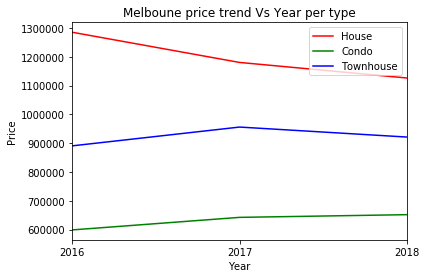

In [39]:
#sns.lmplot(x="Year", y="Price", hue="Type", data=melbourne_data,  x_estimator=np.mean);
melbourne_data_h_y['Price'].plot(kind='line', color='r',label='House')
melbourne_data_u_y['Price'].plot(kind='line', color='g',label='Condo')
melbourne_data_t_y['Price'].plot(kind='line', color='b',label='Townhouse')
year_xticks=[2016,2017,2018]
plt.ylabel('Price')
plt.xticks( year_xticks)
plt.title('Melboune price trend Vs Year per type')
plt.legend()

House price was going down dramatically by 100,000 units
Condo price climb up slowly while Townhouse price kept steady.
From this graph, it is anticipated that house price will keptgoing down but less slope
Townhouse price will kepte unchanged
Condo price will increase.
To developer, it is time to built more condos in 2019.House budget need to be cut
For home buyers, it is time to buy house in 2019.

###### 2.2 Predicting house price for all types in South Metro, units in South Metro and units in East Melbourne for 2019 and 2020

In [40]:
melbourne_data.shape

(27239, 19)

In [41]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'PriceRange',
       'Year'],
      dtype='object')

In [42]:

melbourne_data_South_M=melbourne_data[melbourne_data['Regionname']=='Southern Metropolitan']
melbourne_data_South_M_average=melbourne_data_South_M.groupby(['Year'])['Price'].mean()
# Series.to_frame()


In [43]:
# create X and y

X = melbourne_data_South_M[[ 'Year']]
y = melbourne_data_South_M[['Price']]

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print (lm2.intercept_)
print (lm2.coef_)

[-1.44577955e+08]
[[72380.18518551]]


In [44]:

### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Year': [2019,2020,2021]})

# predict for a new observation
lm2.predict(X_new)

array([[1557639.01778024],
       [1630019.20296574],
       [1702399.38815126]])

From this rough approximation, 2019 average price will be 1557639, 1630019 for 2020 for all types in melboune

# 2.2.1 Predict prcie for S Metro unit

In [45]:
melbourne_data_SM=melbourne_data[melbourne_data['Regionname']=='Southern Metropolitan']
melbourne_data_SM_u=melbourne_data_SM[melbourne_data_SM['Type']=='u']
melbourne_data_SM_u.shape

(2782, 19)

In [46]:

### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Price ~ Year', data=melbourne_data_SM_u).fit()

# print the coefficients
lm1.params

Intercept   -9.091530e+07
Year         4.542376e+04
dtype: float64

In [47]:

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Year': [2016,2017,2018,2019,2020,2021]})

# predict for a new observation
lm1.predict(X_new)

0    659000.900688
1    704424.661081
2    749848.421474
3    795272.181867
4    840695.942260
5    886119.702653
dtype: float64

In [48]:
lm1.rsquared

0.008001531244450577

For Condo in S Metro region, price will be aroud 795272 dollars with lower R2

###### 2.2.2 Predicting prcie for E Metro unit

In [49]:

melbourne_data_E=melbourne_data[melbourne_data['Regionname']=='Eastern Metropolitan']
melbourne_data_E_u=melbourne_data_E[melbourne_data_E['Type']=='u']

lme = smf.ols(formula='Price ~ Year', data=melbourne_data_E_u).fit()

# print the coefficients
lme.params

Intercept   -1.307691e+08
Year         6.518521e+04
dtype: float64

In [50]:
melbourne_data_E_u.shape

(431, 19)

In [51]:
X_new = pd.DataFrame({'Year': [2016,2017,2018,2019,2020,2021]})

# predict for a new observation
lme.predict(X_new)

0    644313.326193
1    709498.532146
2    774683.738099
3    839868.944051
4    905054.150004
5    970239.355957
dtype: float64

For E Metro, price grow 10% from 2016 to 2017 and 7.7% from 2018 to 2019 can be expected. though count is less compared to southern region


##### 2.3 Seasonal performance

In [52]:
#get month information from date 
#df['year_month']=df.datetime_column.apply(lambda x: str(x)[:7])
#per = df.Date.dt.to_period("M")
# How many calls, sms, and data entries are in each month?
#data.groupby(['month', 'item'])
#df['birthdate'].groupby([df.birthdate.dt.year, df.birthdate.dt.month]).agg('count')
melbourne_data['Month']=pd.DatetimeIndex(melbourne_data['Date']).month

#lois[_y_m]=lois['Price'].groupby(['Month']).mean()
#Prepare data for pie chart to check sales based on month in order to see which month sell most.
melbourne_data_2016=melbourne_data[melbourne_data['Year']==2016]
melbourne_data_2017=melbourne_data[melbourne_data['Year']==2017]
melbourne_data_2018=melbourne_data[melbourne_data['Year']==2018]
melbourne_data_2016_count=melbourne_data_2016.groupby(['Month']).count()
melbourne_data_2017_count=melbourne_data_2017.groupby(['Month']).count()
melbourne_data_2018_count=melbourne_data_2018.groupby(['Month']).count()
Comparison={2016:melbourne_data_2016.shape,2017:melbourne_data_2017.shape,2018:melbourne_data_2018.shape}
Comparison

{2016: (8053, 20), 2017: (15512, 20), 2018: (3674, 20)}

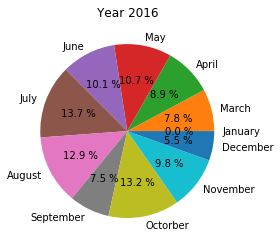

In [53]:
label_2016=['January','March','April','May','June','July','August','September','Octorber','November','December']
plt.pie(melbourne_data_2016_count['Price'],labels=label_2016,autopct='%.1f %%')
plt.title('Year 2016')
plt.show()

Text(0.5, 1.0, 'Year 2017')

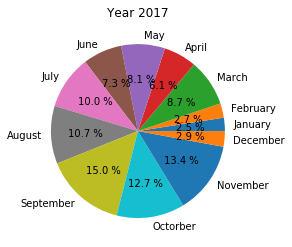

In [54]:
label_2017=['January','February','March','April','May','June','July','August','September','Octorber','November','December']
plt.pie(melbourne_data_2017_count['Price'],labels=label_2017,autopct='%.1f %%')
plt.title('Year 2017')

Text(0.5, 1.0, 'Year 2018')

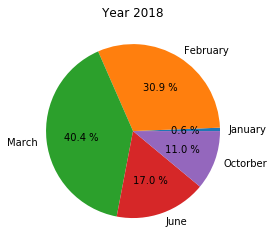

In [55]:
label_2018=['January','February','March','June','Octorber']
plt.pie(melbourne_data_2018_count['Price'],labels=label_2018,autopct='%.1f %%')
plt.title('Year 2018')

In general, it looks like that winters in 2016 an 2017 have the least sales count. that means house sales will favors more from May to November. Year 2018 seems a lot of missing data and date shape only one third compard to the others thus it is hard to make conclusion. 

# 2.4 Region versus Price

In [56]:

# Abbreviate Regionname categories for presentation
melbourne_data['Regionabb'] = melbourne_data['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

# 2.4.1 Region price change vs year per type

In General, East, north, south and west Metro are popular area based on sales count.

Next look at price against region per type


(2015, 2020)

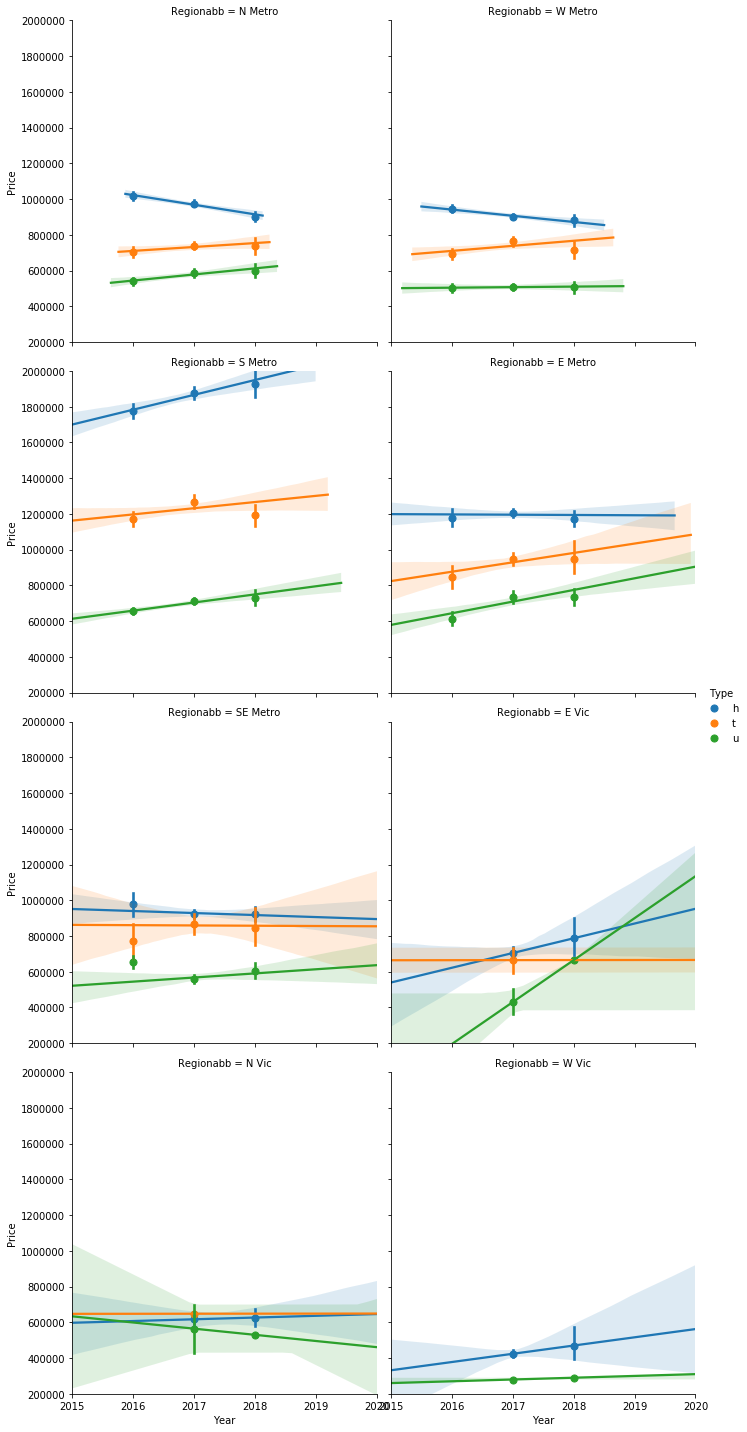

In [57]:

sns.lmplot(x="Year", y="Price",hue="Type", data=melbourne_data,col='Regionabb', x_estimator=np.mean,col_wrap=2)
plt.ylim(200000, 2000000)
plt.xlim(2015,2020)

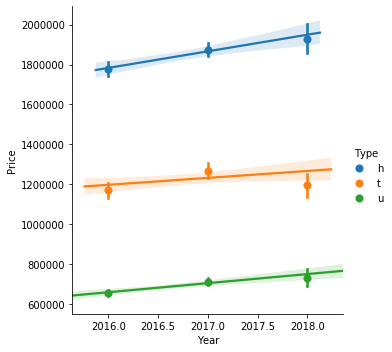

In [58]:
#South region price change vs year per type
sns.lmplot(x="Year", y="Price",hue="Type", data=melbourne_data[melbourne_data['Regionabb']=='S Metro'], x_estimator=np.mean);

In general, Townhouse in E Metro, Condo in East Metro, House in S Metro, Condo in S Metro and Condo in N Metro are growing each year.

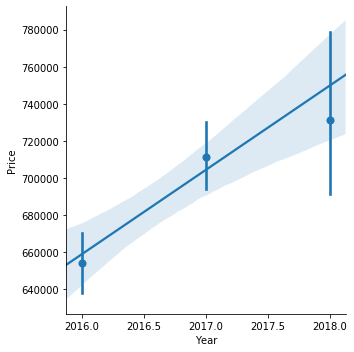

In [59]:
# East region price change vs year one type
melbourne_data_S=melbourne_data[melbourne_data['Regionabb']=='S Metro']
sns.lmplot(x="Year", y="Price", data=melbourne_data_S[melbourne_data_S['Type']=='u'], x_estimator=np.mean);

Get mean value for price for each year, region per type

##### 2.4.2 Feature engineering to get count growth and price growth against year per region and type

In [60]:
Pct_change=melbourne_data.groupby(['Year','Regionabb','Type'],as_index=False)['Price'].mean()
Pct_change = Pct_change.sort_values(['Regionabb', 'Type','Year']).set_index(np.arange(len(Pct_change.index)))

Pct_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 4 columns):
Year         72 non-null int64
Regionabb    72 non-null object
Type         72 non-null category
Price        59 non-null float64
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [61]:
melbourne_data_count_region_y=melbourne_data.groupby(['Year','Regionabb','Type'],as_index=False)['Price'].count()
melbourne_data_count_region_y = melbourne_data_count_region_y.sort_values(['Regionabb', 'Type','Year']).set_index(np.arange(len(melbourne_data_count_region_y.index)))
melbourne_data_count_region_y.rename(columns={'Price':'Count'}, inplace=True)


In [62]:
# define fucntion to get year growth rate again price per region and type
def PCTM(gg):
    df=pd.DataFrame(gg['Price'].pct_change())
    df['Year']=gg['Year']
    df['region']=gg['Regionabb']
    df['Type']=gg['Type']
    df=df[df['Year']!=2016]
    return df

##### 2.4.2.1 Price growth rate over 0.05 table per region and type

In [63]:
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]
melboune_growthrate_y_t=PCTM(Pct_change)
melboune_growthrate_y_t1=melboune_growthrate_y_t[melboune_growthrate_y_t['region'].isin(['N Metro','S Metro','E Metro','SE Metro','W Metro','S Metro'])]
melboune_growthrate_y_t1.rename(columns={'Price':'Price Growth Rate'}, inplace=True)
melboune_growthrate_y_t1[melboune_growthrate_y_t1['Price Growth Rate']>0.05]

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Price Growth Rate,Year,region,Type
4,0.117096,2017,E Metro,t
7,0.196149,2017,E Metro,u
22,0.052594,2017,N Metro,t
25,0.081640,2017,N Metro,u
37,0.054699,2017,S Metro,h
40,0.084488,2017,S Metro,t
43,0.087175,2017,S Metro,u
49,0.126635,2017,SE Metro,t
53,0.078007,2018,SE Metro,u
58,0.101220,2017,W Metro,t


Due to a lot of missing data in 2018, S Metro units has 8.7% in 2017 and 2.7% in 2018. If 2017 was chozen to look at growth in price, units and townhouse in E Metro,SE Metro and S Metro, townhouse in W Metro and house in S Metro present positive growth over 5%. looking at 2018, it seems people shift to buy more from SE or E Metro from S Metro. But this shift was not that significant yet in count as it showed in later table. Trend is there.

In [64]:
Sales_count=melbourne_data.groupby(['Regionabb'])['Price'].count()
Sales_count.head(10)

Regionabb
E Metro     3271
E Vic        166
N Metro     7864
N Vic        166
S Metro     8520
SE Metro    1340
W Metro     5814
W Vic         95
Name: Price, dtype: int64

##### 2.4.2.2 Top 20 region per type with largest count

In [65]:
Sales_count=melbourne_data.groupby(['Regionabb','Type'])['Price'].count()
Sales_count.nlargest(20)

Regionabb  Type
N Metro    h       5309
S Metro    h       4718
W Metro    h       4435
S Metro    u       2782
E Metro    h       2551
N Metro    u       1689
SE Metro   h       1036
S Metro    t       1020
N Metro    t        866
W Metro    u        810
           t        569
E Metro    u        431
           t        289
SE Metro   u        185
N Vic      h        162
E Vic      h        159
SE Metro   t        119
W Vic      h         93
E Vic      u          5
N Vic      u          3
Name: Price, dtype: int64

In [66]:

            # define fucntion to get year growth rate again count per region and type
def PCTMC(gg):
    df=pd.DataFrame(gg['Count'].pct_change())
    df['Year']=gg['Year']
    df['region']=gg['Regionabb']
    df['Type']=gg['Type']
    df=df[df['Year']!=2016]
    return df

##### 2.4.2.3 Count growth rate over 0.2 table per region and type

In [67]:
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]
melboune_growthrate_y_c=PCTMC(melbourne_data_count_region_y)
melboune_growthrate_y_c1=melboune_growthrate_y_c[melboune_growthrate_y_c['region'].isin(['N Metro','S Metro','E Metro','SE Metro','W Metro','S Metro'])]

melboune_growthrate_y_c1.rename(columns={'Count':'Count Growth Rate'}, inplace=True)
melboune_growthrate_y_c1[melboune_growthrate_y_c1['Count Growth Rate']>0.2]

,Count Growth Rate,Year,region,Type
1,2.753304,2017,E Metro,h
4,2.357143,2017,E Metro,t
7,1.570000,2017,E Metro,u
19,1.007979,2017,N Metro,h
22,0.721014,2017,N Metro,t
25,0.435563,2017,N Metro,u
37,0.325248,2017,S Metro,h
40,0.575581,2017,S Metro,t
43,0.289617,2017,S Metro,u
46,19.641026,2017,SE Metro,h


##### 2.4.2.4 Actual count over 1000 for each year pet type and region 

In [68]:
melboune_count1=melbourne_data_count_region_y[melbourne_data_count_region_y['Regionabb'].isin(['S Metro','E Metro','SE Metro','W Metro','S Metro','N Metro'])]
melboune_count1[melboune_count1['Count']>1000]

,Year,Regionabb,Type,Count
1,2017,E Metro,h,1704.0
18,2016,N Metro,h,1504.0
19,2017,N Metro,h,3020.0
36,2016,S Metro,h,1814.0
37,2017,S Metro,h,2404.0
42,2016,S Metro,u,1098.0
43,2017,S Metro,u,1416.0
54,2016,W Metro,h,1260.0
55,2017,W Metro,h,2543.0


From above information count growth percentage and acutal sales count by year, South metro and N Metro seems to be the area where people tend to pay more and buy more, but as price kept going up, those live in south try to move to E and SE Metro

To Conclude this section:

1.Regarding house, S Metro has over 5 % in price growth in 2017 and 4718 sales count in three years, ranking second place among all.In terms of Units/Condo, S Metro has 2782 in sales count ranking No.4 and 8.7 % in price growth in 2017.

2.Units and townhouses in E Metro and SE MEtro has great potential tough now they dont have such attraction as S Metro. They have count growth over 100% and price growth rate over 8%.

##### 2.5 Suplots of other numeric features v price

###### 2.5.1 Method vs Price

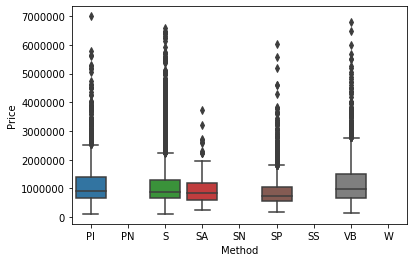

In [69]:
sns.boxplot(x = 'Method', y = 'Price', data = melbourne_data)
plt.show()
#Sold method did not affect price

###### 2.5.2 Rooms # impact on Prcie VS Year

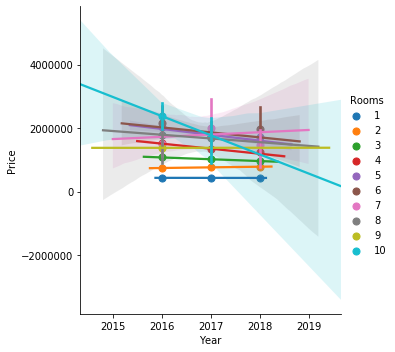

In [70]:
sns.lmplot(x="Year", y="Price", hue="Rooms", data=melbourne_data,  x_estimator=np.mean);

2.5.3 Distance vs Price

Insights: Increase distance reduce price

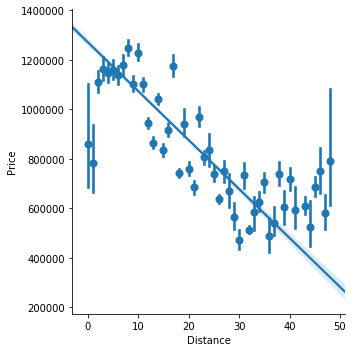

In [71]:
sns.lmplot(x="Distance", y="Price", data=melbourne_data, x_estimator=np.mean);

###### 2.5.4 Car spot vs Price

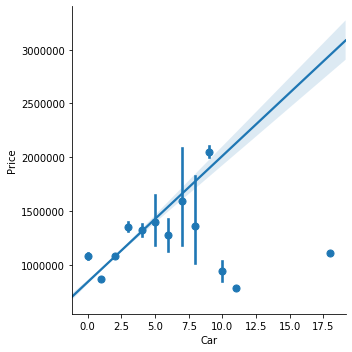

In [72]:
sns.lmplot(x="Car", y="Price", data=melbourne_data, x_estimator=np.mean);

# 2.6 Ideal house type

In this section, Count will be used to find out leads about the best sales type in all region.

###### 2.6.1 Top 10 house type in S Metro with different rooms and bathrooms by count

In [73]:


Ideal_House=melbourne_data.groupby(['Regionabb','Type','Rooms','Bathroom'])['Price'].count()


Ideal_House.loc[['S Metro'],'h'].nlargest(10)

Regionabb  Type  Rooms  Bathroom
S Metro    h     3      1.0         1153
                        2.0          817
                 4      2.0          785
                 2      1.0          580
                 4      1.0          388
                        3.0          299
                 5      3.0          169
                        2.0          137
                        1.0           73
                 2      2.0           59
Name: Price, dtype: int64

Insights: In S Metro, house with 3 rooms and 1 or 2 bathroom and house with 4 rooms and 2 bathrooms have the most sales among all.

###### 2.6.2 Top 10 house type in all regions per type with different rooms and bathrooms by count

In [74]:
Ideal_House.nlargest(10)

Regionabb  Type  Rooms  Bathroom
N Metro    h     3      1.0         2034
W Metro    h     3      1.0         1659
S Metro    u     2      1.0         1608
           h     3      1.0         1153
N Metro    u     2      1.0          931
           h     2      1.0          912
S Metro    h     3      2.0          817
                 4      2.0          785
N Metro    h     3      2.0          779
W Metro    h     3      2.0          769
Name: Price, dtype: int64

Insights:North metro house was the most favorable types among those and W Metro follow behind. In general, house is more favorable than other types. South Metro condo with 2 bed rooms and 1 bathroom was listed as top 3 in sales count.

###### 2.6.3 Top 10 units in E Metro with different rooms and bathrooms by count

In [75]:
Ideal_House.loc[['E Metro'],'u'].nlargest(10)

Regionabb  Type  Rooms  Bathroom
E Metro    u     2      1.0         230
                 3      1.0         122
                        2.0          42
                 1      1.0          13
                 2      2.0          11
                 4      1.0           6
                        2.0           5
                 2      0.0           1
                 4      3.0           1
Name: Price, dtype: int64

The best Condo type in East region Metropolitan is 2 rooms with one bed room.

###### 2.7 Heat map for presenting relationship

In [76]:
corrmat=melbourne_data.corr()

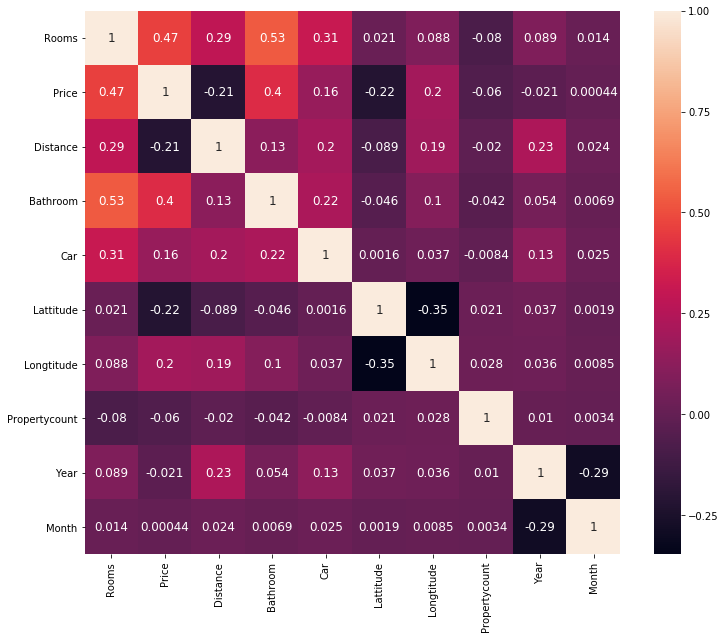

In [77]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size': 12})

Define function to refine those correlation more than 0.3 with abs value

In [78]:
#define function to refine those correlation more than 0.3 with abs value
def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [79]:
threshold=0.4
corr_value=getCorrelatedFeature(corrmat['Price'],threshold)
corr_value

,Corr Value
Rooms,0.467636
Price,1.000000


Rooms and Bathroom has highest correlation with house price compared to other factors.

# 3.0 Linear model for coefficient to present impact for 'Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code',region

# 3.1 Prepare the dataset and label for training models, include removing all null value, get_dummies of region, change type into numeric

In [80]:
melbourne_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bathroom            0
Car                 0
CouncilArea         3
Lattitude        6254
Longtitude       6254
Regionname          3
Propertycount       3
PriceRange          0
Year                0
Month               0
Regionabb           3
dtype: int64

In [81]:
melbourne_data['Type_Code'] = melbourne_data['Type'].map({'h':3,
                                            't':2, 
                                            'u':1, 
                                            'dev site':0, 
                                            'o res':0, 
                                            'br':0})


Used get_dummies to change category data into numeric date. Region will be expressed in numerics

In [82]:
# Group Regionname categories 
melbourne_data1 = pd.get_dummies(melbourne_data['Regionabb'],drop_first=False)
melbourne_data=pd.concat([melbourne_data,melbourne_data1],axis=1)
melbourne_data.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'PriceRange', 'Year', 'Month', 'Regionabb', 'Type_Code', 'E Metro',
       'E Vic', 'N Metro', 'N Vic', 'S Metro', 'SE Metro', 'W Metro',
       'W Vic'], dtype=object)

In [83]:

#fig,ax=plt.subplots(figsize=(12,10))
#df=melbourne_data[['Price','Rooms','Distance', 'Bathroom',  'Year', 'Type_Code','RegionCode']]
#sns.heatmap(df,annot=True)
#dff=melbourne_data[['Price','Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code',]].groupby('RegionCode')
#dff.head()

In [84]:
melbourne_data_NN=melbourne_data[['Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code','N Metro','W Metro','S Metro','E Metro','SE Metro','N Vic','E Vic','W Vic','Price']].dropna()
melbourne_data_NN[['Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code','N Metro','W Metro','S Metro','E Metro','SE Metro','N Vic','E Vic','W Vic','Price']].isnull().sum()

Rooms            0
Distance         0
Bathroom         0
Car              0
Year             0
Propertycount    0
Type_Code        0
N Metro          0
W Metro          0
S Metro          0
E Metro          0
SE Metro         0
N Vic            0
E Vic            0
W Vic            0
Price            0
dtype: int64

In [85]:
melbourne_data_NN.shape

(27236, 16)

27236 records will applied to the model

In [86]:
#Finding coefficient

X=melbourne_data_NN[['Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code','N Metro','W Metro','S Metro','E Metro','SE Metro','N Vic','E Vic','W Vic']]
y=melbourne_data_NN['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state=5)

In [87]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:

# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [89]:
regressor.score(X_test,y_test)

0.5706629253654566

In [90]:

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 281982.851609699
MSE: 172736563981.94385
RMSE: 415615.88514148956


In [91]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5706984739727002


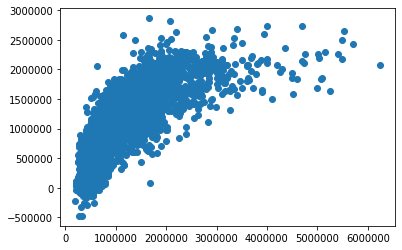

In [92]:
plt.scatter(y_test, y_pred)

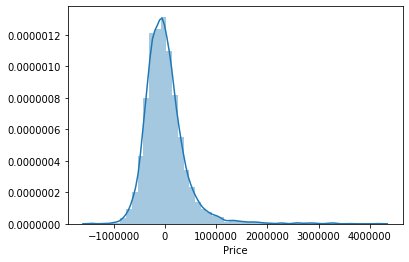

In [93]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

##### 3.2 Getting coefficient

In [94]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,217253.425422
Distance,-42651.788584
Bathroom,141730.549265
Car,37952.843579
Year,29458.694976
Propertycount,0.265368
Type_Code,235465.603192
N Metro,-303961.129306
W Metro,-378402.904456
S Metro,224194.177339


Before using fillna.mode
Every unit increase in those features will:
Rooms is linked to an increase in Price by 170624.6
Distance is linked to an decrease in Price by 44797
Bathroom is linked to an increase in Price by 185170
Car space is linked to an increase in Price by 38890
Year is linked to an increase in Price by 44305
Type code is associated with increase in Price by 271838

After using fillna
Every unit increase in those features will:
Rooms is linked to an increase in Price by 217253.4
Distance is linked to an decrease in Price by 42651.8
Bathroom is linked to an increase in Price by 141730.5
Car space is linked to an increase in Price by 37952
Year is linked to an increase in Price by 29458.7
Type code is associated with increase in Price by 235465

Type code, Rooms and bathroom are very important in house price. With limited landsize, the more rooms and bathroom, the higher the price is.
 
S Metro, SE Metro seems to be linked to an increase in price

# 3.3 Random tree forest model for coefficient to present impact for 'Rooms','Distance', 'Bathroom', 'Car', 'Year', 'Propertycount','Type_Code',region

In [95]:
X.head()

,Rooms,Distance,Bathroom,Car,Year,Propertycount,Type_Code,N Metro,W Metro,S Metro,E Metro,SE Metro,N Vic,E Vic,W Vic
1,2,2.0,1.0,1.0,2016,4019.0,3,1,0,0,0,0,0,0,0
2,2,2.0,1.0,0.0,2016,4019.0,3,1,0,0,0,0,0,0,0
4,3,2.0,2.0,0.0,2017,4019.0,3,1,0,0,0,0,0,0,0
5,3,2.0,2.0,1.0,2017,4019.0,3,1,0,0,0,0,0,0,0
6,4,2.0,1.0,2.0,2016,4019.0,3,1,0,0,0,0,0,0,0


In [96]:
from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier(n_estimators=20)
#model.fit(X_train,y_train)

In [97]:
clf=RandomForestClassifier(n_jobs=2,n_estimators=50,random_state=1)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [98]:
clf.predict(X)

array([ 890000., 1315000., 1165000., ...,  705000.,  855000., 1020000.])

In [99]:
clf.score(X_test,y_test)

0.4495227606461087

In [100]:
y_predictclf=clf.predict(X_test)

# 3.4 Model comparison

In [101]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
folds=StratifiedKFold(n_splits=3)

In [102]:

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [103]:
print(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))

0.013032305433186491


In [104]:
print(get_score(LinearRegression(), X_train, X_test, y_train, y_test))

0.5706629253654566


Linear has better score

### 4.0 Performance evaluation

Using define function to evaluate different input threshold for correlation value

Explore relationships between input sample size and machine learning scores

Only correlation more than 0.4 was selected below. so Rooms and Bathroom fall into this category

##### 4.1 Define fuction to get correlation, refine results and storage value


In [105]:
correlated_data=melbourne_data_NN[corr_value.index]
correlated_data.head()

,Rooms,Price
1,2,1480000.0
2,2,1035000.0
4,3,1465000.0
5,3,850000.0
6,4,1600000.0


In [106]:
corr_value.index

Index(['Rooms', 'Price'], dtype='object')

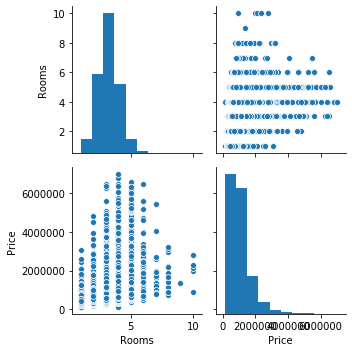

In [107]:
sns.pairplot(correlated_data)
plt.tight_layout()

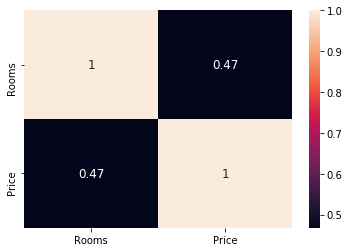

In [108]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})

Only extract data with high relations to price

In [109]:
X1=correlated_data.drop(labels=['Price'],axis=1)
y1=correlated_data['Price']
X1.head()

,Rooms
1,2
2,2
4,3
5,3
6,4


In [110]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [111]:
X1_train.shape,X1_test.shape

((21788, 1), (5448, 1))

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [113]:
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y1_predict=model.predict(X1_test)

In [115]:
y1_predict,y1_test

(array([ 736889.27905733,  736889.27905733, 1052208.4883895 , ...,
        1052208.4883895 ,  421570.06972517, 1052208.4883895 ]),
 3559     1265000.0
 18562     650000.0
 16918     670000.0
 8676      756000.0
 1399     1200000.0
 15785     600000.0
 21861     580000.0
 3757      700000.0
 29652     570000.0
 28116     670000.0
 12966     560000.0
 6896      902000.0
 1072     2910000.0
 30713     885000.0
 24546     630000.0
 4756      758000.0
 522       801000.0
 25420    1060000.0
 12628     677776.0
 14505     655000.0
 33217     801000.0
 181      1532000.0
 31994    1775000.0
 14137    1410000.0
 7916      390000.0
 30718     835000.0
 16083    1900000.0
 21008     377000.0
 29104     420000.0
 14540     637000.0
            ...    
 5213     1420000.0
 5016     1715000.0
 16844     690000.0
 22164     860000.0
 14995     764000.0
 31548     900000.0
 27247     640000.0
 18165    1800800.0
 16340     480000.0
 4049     1266000.0
 2470     1100000.0
 7156      800000.0
 14867   

In [116]:
df=pd.DataFrame(data=[y1_predict,y1_test])
df.T.head(5)


,0,1
0,7.368893e+05,1265000.0
1,7.368893e+05,650000.0
2,1.052208e+06,670000.0
3,1.052208e+06,756000.0
4,1.367528e+06,1200000.0


In [117]:
from sklearn.metrics import r2_score

In [118]:
score=r2_score(y1_test,y1_predict)
mae=mean_absolute_error(y1_test,y1_predict)
mse=mean_squared_error(y1_test,y1_predict)
print("r2_score", score)
print("mae", mae)
print("mse", mse)

r2_score 0.21416203097456743
mae 383526.5554203626
mse 294683768910.8599


In [119]:
#store feature performance
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r3_score=[]
mae_value=[]
mse_value=[]


In [120]:
def performance_metrics(features, th, y_true,y_pred):
    score=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r3_score.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe=pd.DataFrame(data=[total_features_name, total_features,selected_correlation_value,r3_score,mae_value,mse_value],index=['Features name','Total features','corre value','r2 score','mae','mse'])
    return metrics_dataframe.T

In [121]:
def get_y_predict(corrdata):
    X=corrdata.drop(labels=['Price'],axis=1)
    y=corrdata['Price']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_predict
    

In [123]:
th5=0.4
corr_value=getCorrelatedFeature(corrmat['Price'],th5)
correlated_data=melbourne_data_NN[corr_value.index]
y_predict=get_y_predict(correlated_data)
performance_metrics(correlated_data.columns,th5,y_test,y_predict)

,Features name,Total features,corre value,r2 score,mae,mse
0,"Index(['Rooms', 'Price'], dtype='object')",1,0.4,-0.240999,514777,4.99295e+11



##### 4.2 Learning curve : Plot training scores against validation score

In [125]:
#Ploting learning curves
from sklearn.model_selection import learning_curve, ShuffleSplit

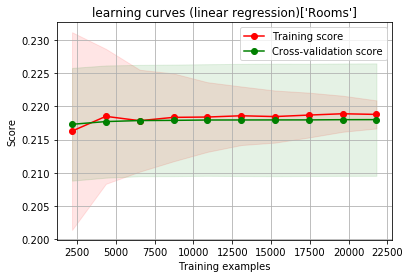

In [126]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color="r")
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color="g")
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

X=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']

title="learning curves (linear regression)" + str(X.columns.values)
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)

estimator=LinearRegression()
plot_learning_curve(estimator,title,X1,y1,ylim=(0.7,1.01),cv=cv,n_jobs=-1)

plt.show()

It looks like training examples between 9 000 and 15 000 will give less change to the model.

### 5.CONCLUSION



Based on all 4 sentions, some finding and conclusion can be found as follow:

1.From 2.1.1 section, house price in general will go down and Condo/units price will go up. that means investing in Condo will be better.


2.Regarding house, S Metro has over 5 % in price growth in 2017 and 4718 sales count in three years, ranking second place among all.In terms of Units/Condo, S Metro has 2782 in sales count ranking No.4 and 8.7 % in price growth in 2017 from Section 2.4.

3.Units and townhouses in E Metro and SE MEtro has great potential tough now they dont have such attraction as S Metro. They have count growth over 100% and price growth rate over 8% from Section 2.4.

4.From 2.6 ideal house type, we can see uints/condo in Southern Metro was ranked no.3. Though house in North and West Metro has the most count but their price is going down as showed in section 2.4 sns.lmplot. In terms of counts, Southern condo/units has great market potential as its count rank No.3 and price kept increasing by years presented in section 2.4. Southen house also has great market and rank no.4 after its unit in same region. But the price kept dropping compared to units in same region.

5.From section 3 and 4, though the score is low due to low coefficient values, Southern Metro show No.2 biggest coefficient compared to other regions. E vic coefficient is high but is low in count thus can be neglected. That means Southern Metro has the great market in price.


6.Linear model has some limitations as if more rooms does equal to higher price and more sales count. But its coefficient can help to understand which factor has great impact. If price was only output dependent variables, the conclusion will be biased and not looking at the whole pictures. But if slaes count and price be presented as output variables, a clear picture will be clear. On the other hand, data is data, the perfect r2 sometimes doesn't mean the great insights of a business. The combination of business unstanding and data can present more real insights of business. The dataset miss great amount of value in 2018 and it results in that count cannot be used as model output. Only price can be output variable. So Cout in past three years and count in 2016 to 2017 will provide more leads for market.

7.Continue improvement: 
Due to limited timeframe, some work need to done to improve linear relationship and reduce r2 value:

a.replace null value with median to see if r2 drops (Yes, it drops by 0.01 and reduce effect of increasing unit against price regarding bathroom, car spots; reduce training score and vailidation score by 0.02 and validation score is always under training score by 0.01 throughout 1400 samples). so the code is there in 1.3 but not in effect and more investigation using different strategy will be applied.

b.different regressor or K-Fold model will be applied to reduced r2; 

c.more feature engineering against sales count will be explored, such as count growth in region against year.

8.On the basis of conclusion 1-4, Units with 2 room and one bathroom in Southern Metro will be recommended to investor or home developer as it has 955 count in 3 years, ranking No.3 in counts and price kept increaing steadily 6 %. It is safe area for conservative investment agaist the unstable market. 



Great Thanks to the team work!